# Introducción al Machine Learning

En los últimos años, el aprendizaje automático se ha dado a conocer por sus grandes logros, un ejemplo de esto, es el tan conocido clasificador de *Spam*. Aunque el aprendizaje automático ha cogido mucha fuerza en los últimos años, muchos de los algoritmos ya existían desde hace mucho tiempo.

Algo muy común es creer que el aprendizaje automático es Inteligencia Artificial, si bien es una rama de la inteligencia artificial, y existe una retroalimentación constante entre ML e IA, no todas las aplicaciones de ML terminan en IA.

**¿Que es Machine Learning?**

El Machine Learning es la ciencia (y el arte) de programar ordenadores para que aprendan a partir de los datos. Algunas definiciones:

* El ML es el campo de estudio que da a los ordenadores la capacidad de aprender sin ser programados de manera explícita. (**Arthur Samuel, 1959**)
* Se dice que un programa de ordenador aprende de la experiencia **E**, con respecto a una tarea **T** y una medida de rendimiento **R**, si su rendimiento en **T**, medido por **R**, mejora con la experiencia **E**. (**Tom Mitchell, 1997**)

## Tipos de aprendizaje

* Aprendizaje supervisado
    * Clasificación.
        * Clasificación binaria.
        * Clasificación multiclase.
    * Regresión.

* Aprendizaje no supervisado.
    * Clustering.
    * Reducción de la dimensionalidad.
    * Detección de anomalías.

* Aprendizaje semi-supervisado
* Aprendizaje por refuerzo

### Aprendizaje supervisado

Los algoritmos de aprendizaje supervisado están diseñados para aprender mediante ejemplos con sus respectivas respuestas. Contamos con datos de entrada, en general de forma estructurada, es decir, tenemos muchas observaciones con columnas (variables) y dentro de esos datos, existe una variable que queremos predecir. Por ejemplo, dadas ciertas características de mediciones queremos predecir si una persona tiene diabetes o no.

El flujo sel aprendizaje supervisado es así:

* Tomamos nuestros datos y separamos en variables independientes (predictoras) ***X***, y en una variable ***y*** que queremos predecir (variable dependiente).
* Mostramos pares *(x, y)* a un algoritmo preparado para aprender de nuestros datos, de forma tal que crea un conjunto de reglas o asociaciones para, dada una entrada ***x***, predecir ***y***.
* Cuando el modelo está entranado, queremos que el modelo haga una predicción sobre datos no observados.

Cuando nuestra variable de interés es una categoría, significa que tenemos un problema de **clasificación**. Si nuestra variable de interés es una variable numérica continua, tenemos un problema de **regresión**.

#### Regresión

Wikipedia define el análisis de regresión como:

En estadística, el análisis de regresión es un proceso estadístico para estimar las relaciones entre variables. Incluye muchas técnicas para el modelado y análisis de diversas variables, cuando la atención se centra en la relación entre una variable dependiente y una o más variables indepndientes (o predictoras).

##### Regresión lineal simple

La ecuación de una línea recta está dada por la ecuación

$$y = m*x+b$$

Donde $y$ es la variable dependiente, $x$ la independiente, $m$ la llamada pendiente y $b$ intercepto (o bias en Machine Learning).

En el Machine Learning podemos reescribir la ecuación como:

$$y=w_0+w_1x$$

Siendo $w_0$ y $w_1$ los parámetros del modelo.

**¿Cómo encontramos los parámetros óptimos?**

Hay varios algoritmos para resolver está tarea, el más simple es usar el algoritmo de mínimos cuadrados.

![Imagen tomada de /www.jmp.com](https://www.jmp.com/en_hk/statistics-knowledge-portal/what-is-multiple-regression/fitting-multiple-regression-model/_jcr_content/par/styledcontainer_2069/par/lightbox_4130/lightboxImage.img.png/1548704005203.png)

In [35]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

set_config(display='diagram')
warnings.filterwarnings(action='ignore')

In [2]:
auto = pd.read_csv('../data/mpg.csv', dtype={'model_year': object})
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    object 
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 28.1+ KB


In [4]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


In [5]:
auto.describe(exclude='number')

,model_year,origin,name
count,398,398,398
unique,13,3,305
top,73,usa,ford pinto
freq,40,249,6


In [6]:
## crear datos missing

indices = auto.sample(n=4).index

auto.loc[indices, 'origin'] = np.nan

In [7]:
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          4
name            0
dtype: int64

In [8]:
mpg = auto.pop('mpg')

train_data, test_data, train_label, test_label = train_test_split(auto, mpg, test_size=0.3, random_state=42)


In [9]:
train_data.drop(['model_year', 'name'], axis=1, inplace=True)
test_data.drop(['model_year', 'name'], axis=1, inplace=True)

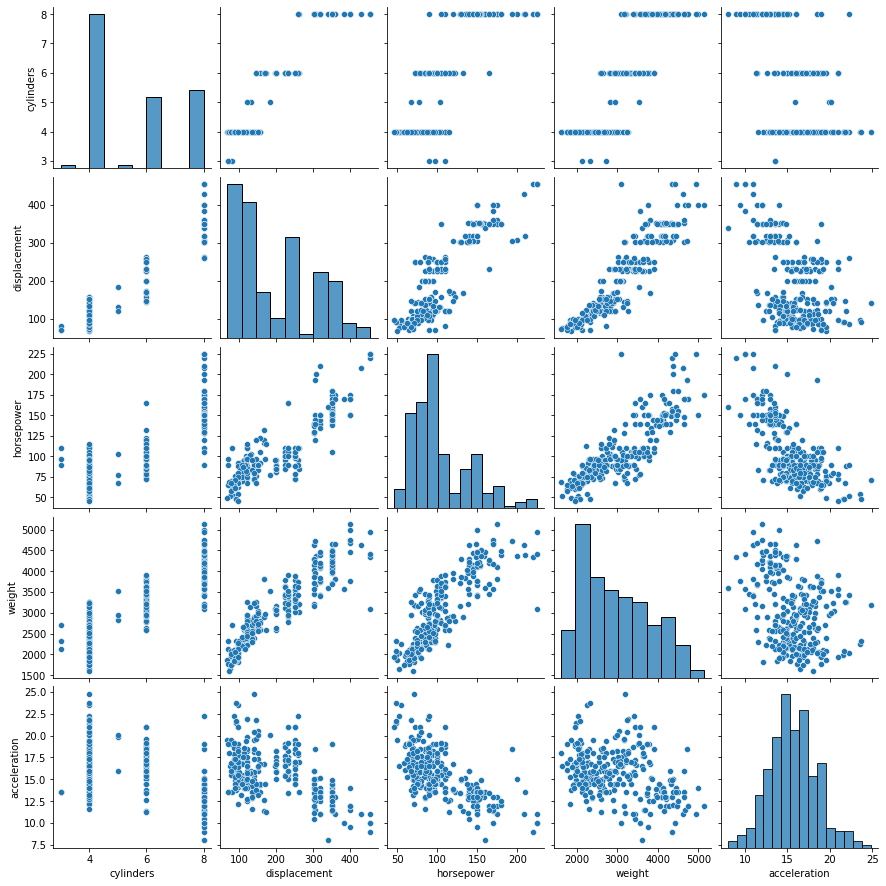

In [10]:
sns.pairplot(train_data)

In [11]:
linear_reg = LinearRegression(normalize=True).fit(train_data['displacement'].values.reshape(-1, 1),
                                                  train_label)

print(f'Los coeficientes del modelo son: \n')
for feature, coeff in zip(['displacement'], linear_reg.coef_):
    print(f'{feature}: {coeff}')

print('-------------------------------------- \n')
print(f'El r2 en los datos de entrenamiento es: {linear_reg.score(train_data["displacement"].values.reshape(-1, 1), train_label) * 100}')


Los coeficientes del modelo son: 

displacement: -0.06249430652547102
-------------------------------------- 

El r2 en los datos de entrenamiento es: 64.37156749363666


##### Regresión lineal multiple

A veces no es tan sencillo usar una variable como predictora para ayudar a explicar algún fénomeno. En este caso podemos usar la generalización de la regresión lineal, haciendo una extensión de la ecuación de la linea a más dimensiones:

$$y=w_0+w_1x_1+w_2x_2+...+w_nx_n$$

Donde $n$ será la cantidad de variables predictoras en nuestros datos y de nuevo $w_i$ será el peso del predictor $x_i$.

En éstos casos ya no tendremos una línea si no un plano, o hiperplano como modelo.

In [12]:
numerical_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
categorical_features = ['origin']

numeric_imputer = SimpleImputer(strategy='median')
categoric_imputer = SimpleImputer(strategy='most_frequent')

train_data[numerical_features] = numeric_imputer.fit_transform(train_data[numerical_features])
train_data[categorical_features] = categoric_imputer.fit_transform(train_data[categorical_features])


In [13]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False).fit(train_data[categorical_features])

columnas = [i.split('_')[1] for i in ohe.get_feature_names().tolist()]

auto_categorical = pd.DataFrame(ohe.transform(train_data[categorical_features]), columns=columnas)
auto_categorical.sample(4)

,europe,japan,usa
155,1.0,0.0,0.0
62,0.0,0.0,1.0
135,0.0,1.0,0.0
139,0.0,0.0,1.0


In [14]:
train_data = pd.concat(objs=[train_data.drop(categorical_features, axis=1).reset_index(drop=True),
                             auto_categorical.reset_index(drop=True)], axis=1)

train_data.head()

,cylinders,displacement,horsepower,weight,acceleration,europe,japan,usa
0,8.0,350.0,145.0,4440.0,14.0,0.0,0.0,1.0
1,4.0,140.0,72.0,2401.0,19.5,0.0,0.0,1.0
2,6.0,200.0,85.0,2587.0,16.0,0.0,0.0,1.0
3,6.0,200.0,95.0,3155.0,18.2,0.0,0.0,1.0
4,6.0,199.0,90.0,2648.0,15.0,0.0,0.0,1.0


In [15]:
linear_reg = LinearRegression(normalize=True, n_jobs=-1).fit(train_data, train_label)

features = numerical_features + columnas

print(f'Los coeficientes del modelo son: \n')
for feature, coeff in zip(features, linear_reg.coef_):
    print(f'{feature}: {coeff}')
print(f'El r2 en los datos de entrenamiento es: {linear_reg.score(train_data, train_label) * 100}')

Los coeficientes del modelo son: 

cylinders: -0.21685527354734263
displacement: 0.004551566093251132
horsepower: -0.0514999490107462
weight: -0.005014846702339906
acceleration: 0.04367898297078927
europe: 0.5862307464913435
japan: 1.8321827078157804
usa: -1.6069796631379052
El r2 en los datos de entrenamiento es: 71.37097340060627


In [16]:
results = pd.DataFrame(linear_reg.coef_, columns=['betas'], index=features)
results.style.background_gradient(cmap='Blues')

,betas
cylinders,-0.216855
displacement,0.004552
horsepower,-0.051500
weight,-0.005015
acceleration,0.043679
europe,0.586231
japan,1.832183
usa,-1.606980


##### Vecinos más cercanos (K-NN)

Es un modelo basado en una idea sencilla. Imagina que tienes una instancia (observación) de la cual quieres saber su etiqueta; entonces, simplemente lo que necesitas hacer es buscar la instancia más parecida (más cercana) que esté etiquetada y asignarle a la instancia la etiqueta de esa instancia. Es decir, la etiqueta que asigna vecinos más cercanos es la etiqueta de la instancia más parecida, lo que llamamos el vecino más cercano.

**¿Cómo medimos la cercanía?**

Para medir la cercanía usamos distancias, y cada observación es un punto en un espacio n-dimensional.

In [17]:
knn = KNeighborsRegressor(n_neighbors=6, n_jobs=-1).fit(train_data, train_label)

print(f'El r2 en los datos de entrenamiento es: {knn.score(train_data, train_label) * 100}')

El r2 en los datos de entrenamiento es: 76.6147179315978


##### ¿Cómo medimos el desempeño de nuestro modelo?

Necesitamos una medida de qué tan bien (o mal) el modelo se ajusta a los datos de entrenamiento. Esta medida de evaluación (función de costo) es el error calculado entre la recta generada $\hat{y}$ (o el hiperplano) a los puntos reales. En el entrenamiento del modelo se encuentran los valores de $w_i$ que minimicen dicha función de costo. Entre las métricas más populares encontramos:

* Error medio absoluto (MAE)

$$MAE = \frac{1}{m}\sum_{i=1}^{m}|\hat{y}_i -y_i|$$

* Error cuadrático medio (MSE)

$$MSE=\frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}_i -y_i\right)^2$$

* Raíz del error cuadrático medio (RMSE)

$$RMSE=\sqrt{\frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}({\bf x})_i -y_i\right)^2}$$

In [18]:
class ModelEvaluation:
    def __init__(self, observed: pd.Series or list, predicted: pd.Series or list):
        self.observed = observed
        self.predicted = predicted
        self.metrics = None

    def calculate_metrics(self):
        self.metrics = {'mae': mean_absolute_error(y_true=self.observed, y_pred=self.predicted),
                        'mse': mean_squared_error(y_true=self.observed, y_pred=self.predicted),
                        'rmse': np.sqrt(mean_squared_error(y_true=self.observed, y_pred=self.predicted))}
        return self.metrics

    def print_metrics(self):
        print(f'El error absoluto medio es: {self.metrics["mae"]}')
        print(f'El error cuadratico medio es: {self.metrics["mse"]}')
        print(f'La raíz del error cuadratico medio es: {self.metrics["rmse"]}')
        return None

In [19]:
test_data[numerical_features] = numeric_imputer.transform(test_data[numerical_features])
test_data[categorical_features] = categoric_imputer.transform(test_data[categorical_features])

auto_categorical = pd.DataFrame(ohe.transform(test_data[categorical_features]), columns=columnas)

test_data = pd.concat(objs=[test_data.drop(categorical_features, axis=1).reset_index(drop=True),
                            auto_categorical.reset_index(drop=True)], axis=1)

test_data.head()

,cylinders,displacement,horsepower,weight,acceleration,europe,japan,usa
0,4.0,91.0,53.0,1795.0,17.4,0.0,1.0,0.0
1,4.0,120.0,79.0,2625.0,18.6,0.0,0.0,1.0
2,6.0,232.0,100.0,2634.0,13.0,0.0,0.0,1.0
3,8.0,318.0,150.0,3940.0,13.2,0.0,0.0,1.0
4,8.0,318.0,150.0,4237.0,14.5,0.0,0.0,1.0


In [20]:
evaluation_linear_reg = ModelEvaluation(observed=test_label,
                                        predicted=linear_reg.predict(test_data))
evaluation_linear_reg.calculate_metrics()
evaluation_linear_reg.print_metrics()

El error absoluto medio es: 3.2547813303618116
El error cuadratico medio es: 15.926279139100414
La raíz del error cuadratico medio es: 3.9907742530867885


In [21]:
evaluation_knn = ModelEvaluation(observed=test_label,
                                 predicted=knn.predict(test_data))
evaluation_knn.calculate_metrics()
evaluation_knn.print_metrics()

El error absoluto medio es: 3.015972222222223
El error cuadratico medio es: 15.149358796296298
La raíz del error cuadratico medio es: 3.892217722108605


##### Pipeline

Una secuencia de datos que procesan componentes se llama *pipeline* de datos. Los *pipelines* son muy comunes en los sistemas de machine learning, puesto que hay muchos datos que manipular y muchas transformaciones de datos que aplicar.

In [22]:
auto = pd.read_csv('../data/mpg.csv', dtype={'model_year': object})
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [23]:
indices = auto.sample(n=4).index
auto.loc[indices, 'origin'] = np.nan

In [24]:
mpg = auto.pop('mpg')

train_data, test_data, train_label, test_label = train_test_split(auto, mpg, test_size=0.3, random_state=42)

In [25]:
numeric_pipeline = Pipeline(steps=[('num_imputer', SimpleImputer(strategy='median')),
                                   ('scaler', StandardScaler())])

categoric_pipeline = Pipeline(steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')),
                                     ('ohe', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('numerical', numeric_pipeline, numerical_features),
    ('categorical', categoric_pipeline, categorical_features)
], remainder='drop')

In [29]:
linear_reg = Pipeline(steps=[('preprocessor', preprocessor),
                             ('linear_model', LinearRegression(n_jobs=-1))]).fit(train_data, train_label)

In [30]:
evaluation_linear_reg = ModelEvaluation(observed=test_label, predicted=linear_reg.predict(test_data))
evaluation_linear_reg.calculate_metrics()
evaluation_linear_reg.print_metrics()

El error absoluto medio es: 3.2346333047190097
El error cuadratico medio es: 15.768078352139094
La raíz del error cuadratico medio es: 3.970903971659236


In [32]:
knn = Pipeline(steps=[('preprocessor', preprocessor),
                      ('knn', KNeighborsRegressor(n_neighbors=42,
                                                  n_jobs=-1))]).fit(train_data, train_label)

In [34]:
evaluation_knn = ModelEvaluation(observed=test_label, predicted=knn.predict(test_data))
evaluation_knn.calculate_metrics()
evaluation_knn.print_metrics()

El error absoluto medio es: 3.051011904761905
El error cuadratico medio es: 15.617840466742253
La raíz del error cuadratico medio es: 3.9519413541628188


##### Búsqueda de los mejores hiperparametros

Para hallar los mejores hiperparametros podemos usar las clases ***GridSearchCV*** o ***RandomSearchCV***.

In [36]:
params = {
    'knn__n_neighbors': [4, 5, 6]
}

knn = Pipeline(steps=[('preprocessor', preprocessor),
                      ('knn', KNeighborsRegressor(n_neighbors=42,
                                                  n_jobs=-1))])

knn_cv = RandomizedSearchCV(estimator=knn, param_distributions=params,
                            scoring='neg_mean_absolute_error', n_jobs=-1, cv=2, random_state=42)

knn_cv.fit(train_data, train_label)

RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('numerical',
                                                                               Pipeline(steps=[('num_imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['cylinders',
                                                                                'displacement',
                                                                                'horsepower',
                                                                                'weight',
                                                                                'acceleration']),
                                                                              ('categorical',
                                                                               Pipeline(steps=[('cat_imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['origin'])])),
                                             ('knn',
                                              KNeighborsRegressor(n_jobs=-1,
                                                                  n_neighbors=42))]),
                   n_jobs=-1,
                   param_distributions={'knn__n_neighbors': [4, 5, 6]},
                   random_state=42, scoring='neg_mean_absolute_error')

In [44]:
print(f'El error absoluto medio del mejor modelo es: {knn_cv.best_score_}')

El error absoluto medio del mejor modelo es: -3.1613309352517986


In [45]:
evaluation_cv = ModelEvaluation(observed=test_label, predicted=knn_cv.best_estimator_.predict(test_data))
evaluation_cv.calculate_metrics()
evaluation_cv.print_metrics()

El error absoluto medio es: 2.885694444444445
El error cuadratico medio es: 13.484354166666666
La raíz del error cuadratico medio es: 3.672104868691343
